<a href="https://colab.research.google.com/github/gankidisaicharan/Stock-Price-Prediction/blob/main/StockMarketPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas as pd

# Define the list of tickers for the four companies
tickers = ['AMZN']

# Define the start and end dates for the data
start_date = '2013-05-01'
end_date = '2019-05-31'

# Collect the data for each ticker and concatenate into a single dataframe
dfs = []
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data['ticker'] = ticker
    dfs.append(data)
df = pd.concat(dfs)

# Save the data to a CSV file
df.to_csv('stock_data.csv', index=False)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = df.reset_index()

In [ ]:
df = df.rename(columns={'index':'Date'})

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2013-05-01,12.695000,12.710000,12.287500,12.411500,12.411500,87828000,AMZN
1,2013-05-02,12.447000,12.646500,12.289000,12.627500,12.627500,78724000,AMZN
2,2013-05-03,12.807000,12.962500,12.735000,12.902500,12.902500,70280000,AMZN
3,2013-05-06,12.904500,12.975000,12.671000,12.786000,12.786000,46956000,AMZN
4,2013-05-07,12.815500,12.987000,12.645500,12.886500,12.886500,62674000,AMZN
...,...,...,...,...,...,...,...,...
1526,2019-05-23,91.829498,92.199997,90.209999,90.774002,90.774002,88486000,AMZN
1527,2019-05-24,91.794502,92.087997,90.892502,91.164001,91.164001,67394000,AMZN
1528,2019-05-28,91.637497,92.463501,91.367500,91.821503,91.821503,64000000,AMZN
1529,2019-05-29,91.155998,91.500000,90.376503,90.959503,90.959503,85580000,AMZN


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Drop any missing values
df.dropna(inplace=True)

# Create a separate DataFrame for each ticker
dfs = {}
for ticker in df['ticker'].unique():
    dfs[ticker] = df[df['ticker']==ticker].copy()

# Normalize the data using Min-Max Scaler
scaler = MinMaxScaler()
for ticker in dfs:
    dfs[ticker]['normalized_close'] = scaler.fit_transform(dfs[ticker]['Close'].values.reshape(-1,1))

# Merge the data for all tickers into a single DataFrame
df_normalized = pd.concat(dfs.values(), axis=0)

# Convert the date column to a datetime object
df_normalized['Date'] = pd.to_datetime(df_normalized['Date'])

# Sort the DataFrame by date
df_normalized.sort_values(by=['Date', 'ticker'], inplace=True)

# Set the date column as the index
df_normalized.set_index('Date', inplace=True)

# Print the first few rows of the normalized DataFrame
print(df_normalized.head())


               Open     High      Low    Close  Adj Close    Volume ticker  \
Date                                                                         
2013-05-01  12.6950  12.7100  12.2875  12.4115    12.4115  87828000   AMZN   
2013-05-02  12.4470  12.6465  12.2890  12.6275    12.6275  78724000   AMZN   
2013-05-03  12.8070  12.9625  12.7350  12.9025    12.9025  70280000   AMZN   
2013-05-06  12.9045  12.9750  12.6710  12.7860    12.7860  46956000   AMZN   
2013-05-07  12.8155  12.9870  12.6455  12.8865    12.8865  62674000   AMZN   

            normalized_close  
Date                          
2013-05-01          0.000000  
2013-05-02          0.002412  
2013-05-03          0.005482  
2013-05-06          0.004181  
2013-05-07          0.005303  


In [ ]:
df_normalized

,Open,High,Low,Close,Adj Close,Volume,ticker,normalized_close
Date,,,,,,,,
2013-05-01,12.695000,12.710000,12.287500,12.411500,12.411500,87828000,AMZN,0.000000
2013-05-02,12.447000,12.646500,12.289000,12.627500,12.627500,78724000,AMZN,0.002412
2013-05-03,12.807000,12.962500,12.735000,12.902500,12.902500,70280000,AMZN,0.005482
2013-05-06,12.904500,12.975000,12.671000,12.786000,12.786000,46956000,AMZN,0.004181
2013-05-07,12.815500,12.987000,12.645500,12.886500,12.886500,62674000,AMZN,0.005303
...,...,...,...,...,...,...,...,...
2019-05-23,91.829498,92.199997,90.209999,90.774002,90.774002,88486000,AMZN,0.874933
2019-05-24,91.794502,92.087997,90.892502,91.164001,91.164001,67394000,AMZN,0.879287
2019-05-28,91.637497,92.463501,91.367500,91.821503,91.821503,64000000,AMZN,0.886629


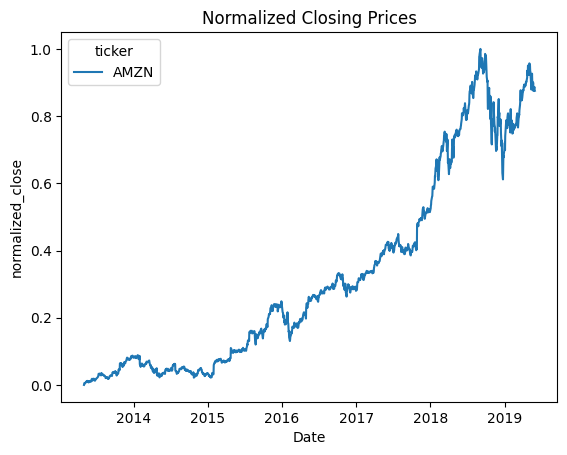

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the normalized closing price for each ticker
sns.lineplot(data=df_normalized, x='Date', y='normalized_close', hue='ticker')
plt.title('Normalized Closing Prices')
plt.show()


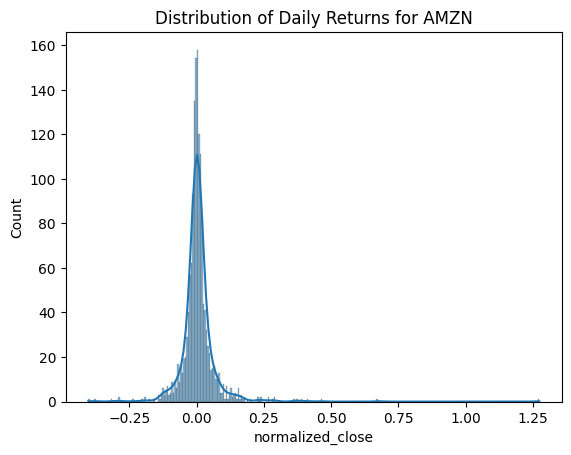

In [ ]:
# Plot the distribution of daily returns for each ticker
for ticker in tickers:
    daily_returns = df_normalized[df_normalized['ticker']==ticker]['normalized_close'].pct_change()
    sns.histplot(data=daily_returns, kde=True)
    plt.title(f'Distribution of Daily Returns for {ticker}')
    plt.show()



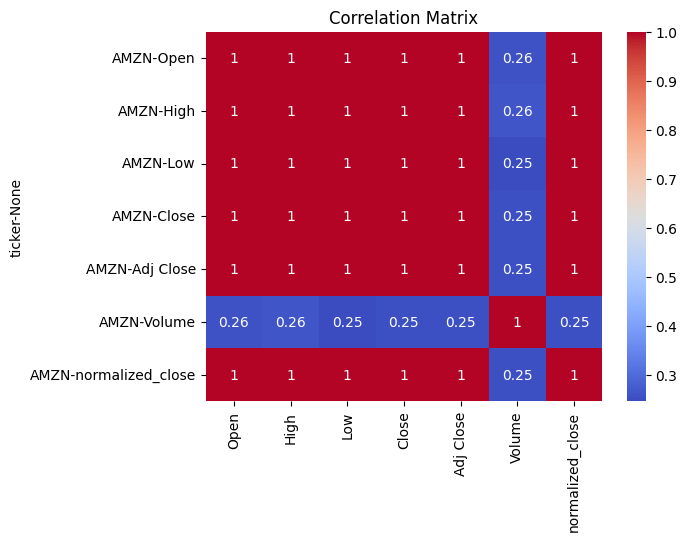

In [ ]:
# Plot the correlation matrix for the dataset
corr = df_normalized.groupby('ticker').corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

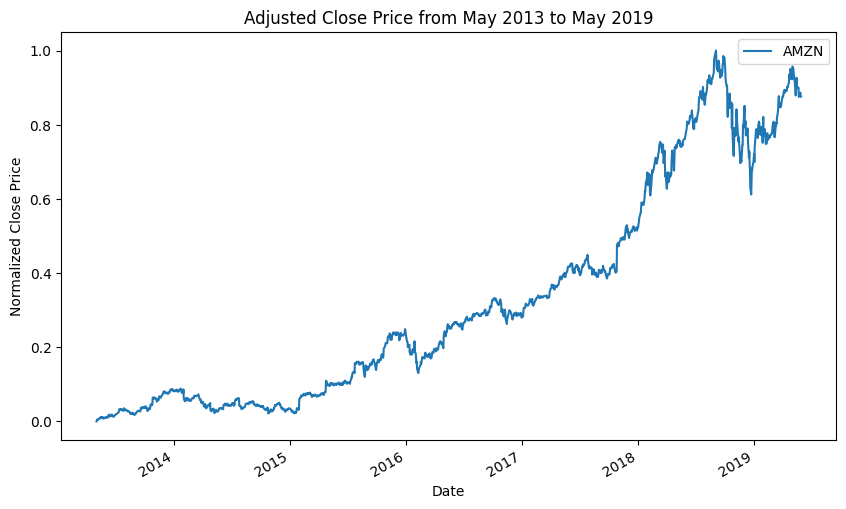

In [ ]:
import matplotlib.pyplot as plt

# Plot the adjusted close price for each stock
fig, ax = plt.subplots(figsize=(10,6))
for ticker in tickers:
    df_normalized[df_normalized['ticker']==ticker]['normalized_close'].plot(ax=ax, label=ticker)

ax.set_title('Adjusted Close Price from May 2013 to May 2019')
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Close Price')
ax.legend()
plt.show()


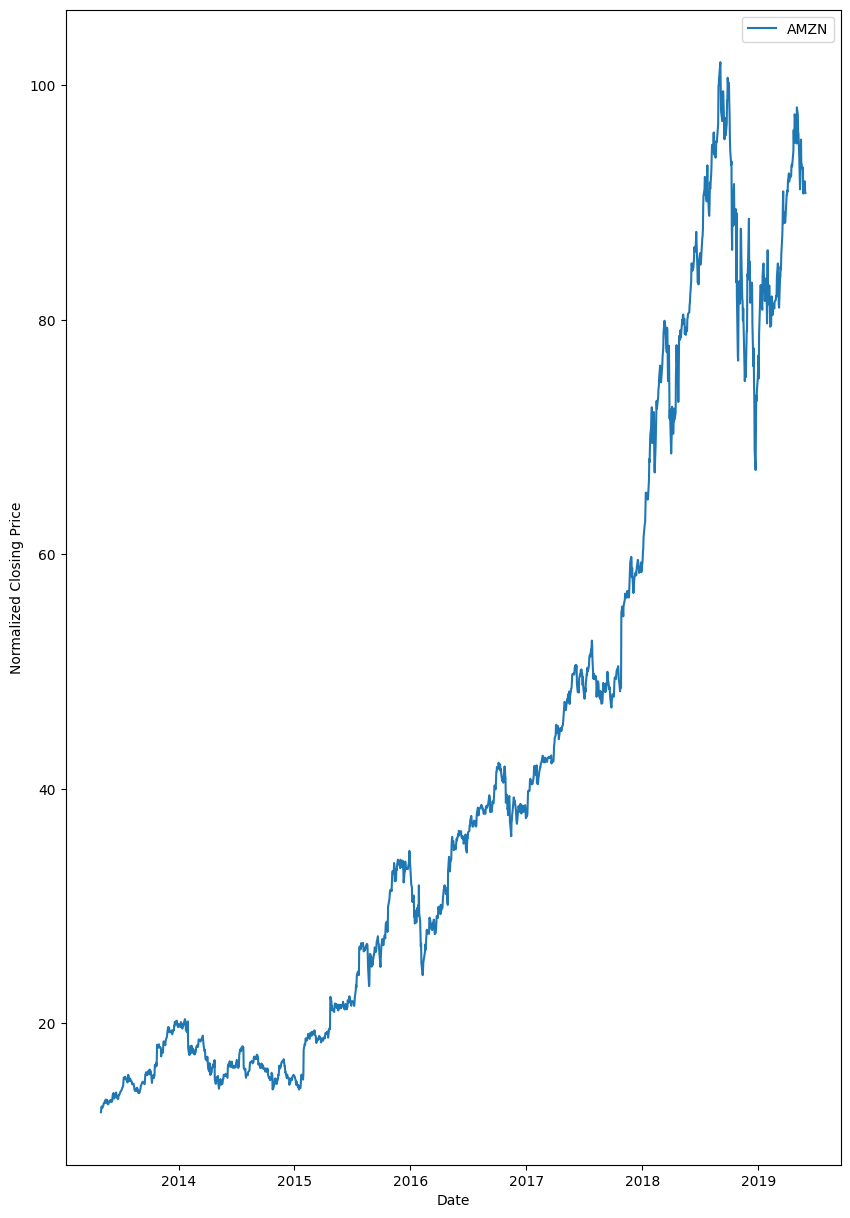

In [ ]:
import matplotlib.pyplot as plt

# Define the tickers
tickers = ['AMZN']

# Plot the historical view of the closing price for each ticker
fig, axs = plt.subplots(nrows=len(tickers), figsize=(10, 15), sharex=True)
for i, ticker in enumerate(tickers):
    axs.plot(df_normalized[df_normalized['ticker'] == ticker]['Close'], label=ticker)
    axs.set_ylabel('Normalized Closing Price')
    axs.legend()

plt.xlabel('Date')
plt.show()


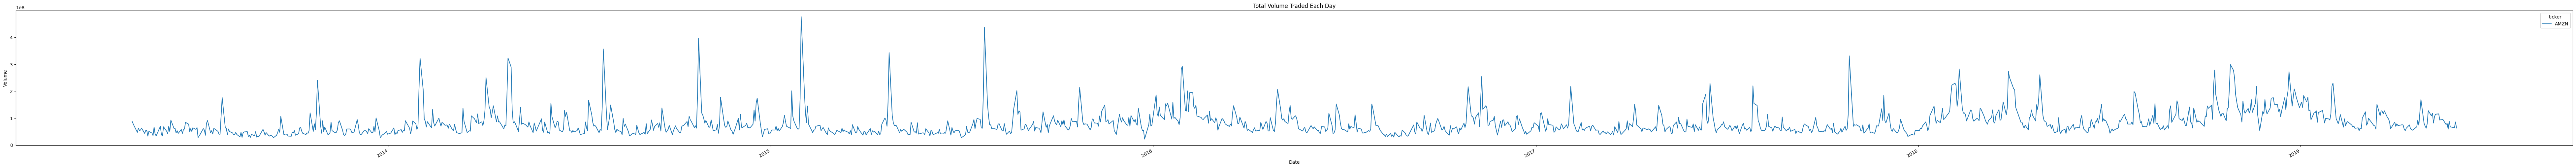

In [ ]:
import matplotlib.pyplot as plt

# Group the data by ticker and date, and sum the volume for each day
df_volume = df.groupby(['ticker', 'Date'])['Volume'].sum().reset_index()

# Pivot the data so that each ticker is a column and the dates are the rows
df_volume = df_volume.pivot(index='Date', columns='ticker', values='Volume')

# Plot the volume for each ticker
df_volume.plot(figsize=(100, 6))
plt.title('Total Volume Traded Each Day')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df_normalized.drop(['normalized_close', 'ticker'], axis=1)
y = df_normalized['normalized_close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Reshape the input data for LSTM model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=32, return_sequences=False))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=1, batch_size=1)

# Save the model
model.save('my_lstm_model.h5')


1224/1224 [==============================] - 23s 11ms/step - loss: 0.0041


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Get the model's predicted stock prices for the test set
y_pred = model.predict(X_test)

# Inverse transform the normalized test predictions to get the actual stock prices
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Inverse transform the normalized test labels to get the actual stock prices
y_test = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Test RMSE:", rmse)



10/10 [==============================] - 2s 5ms/step
Test RMSE: 1.8054629321727218


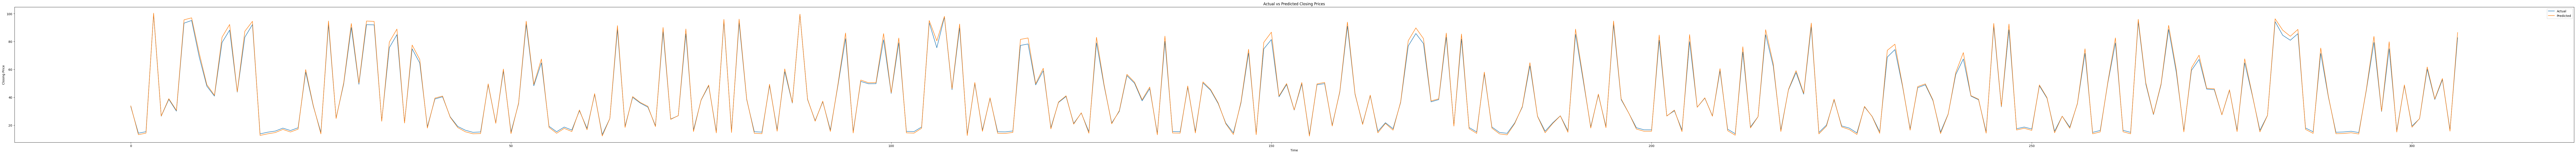

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(150, 8))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.show()


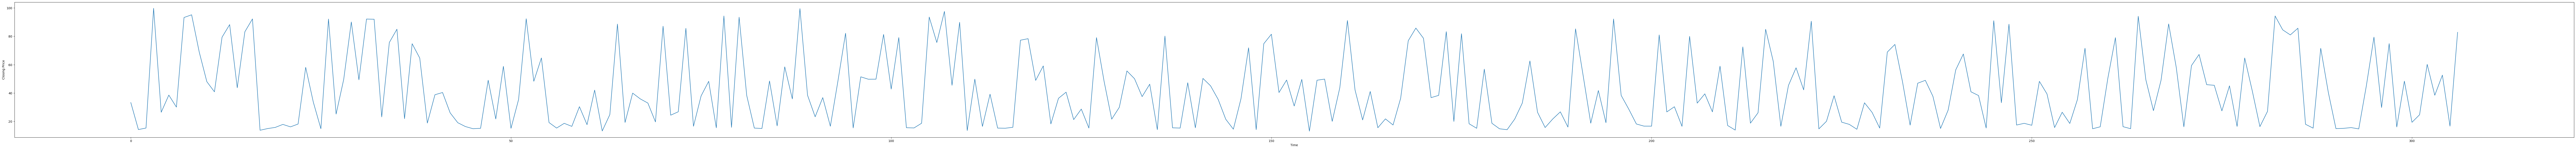

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(150, 8))
plt.plot(y_test, label='Actual')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.show()

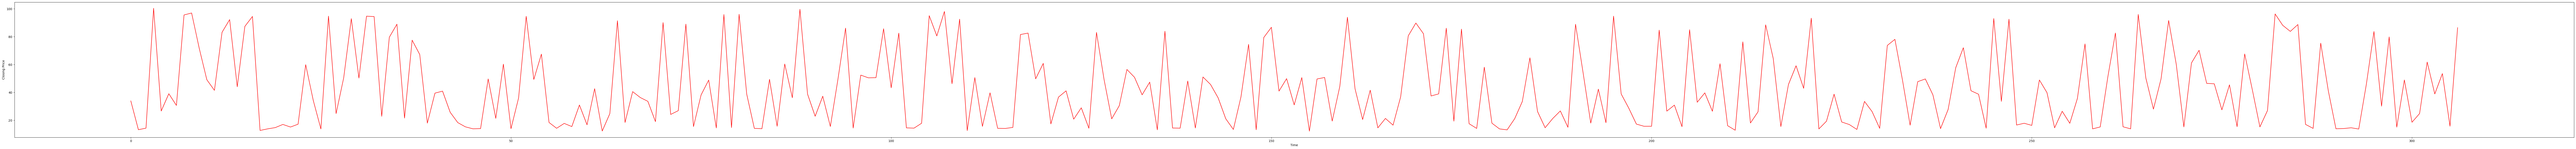

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(150, 8))
plt.plot(y_pred, label='Predicted',color='red')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.show()

In [ ]:
rmse = np.sqrt(np.mean(((y_pred- y_test) ** 2)))
rmse

1.8054629321727218

In [ ]:
mse = np.mean((y_pred - y_test) ** 2)
mse

3.259696399449722

In [ ]:
mae = np.mean(np.abs(y_pred - y_test))
mae

1.3561574240072536

In [ ]:
print(y_pred)

In [ ]:
print(y_test)